In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

In [2]:
rho0 = 1000
g = 9.81
g1_prime = g*2/rho0
g2_prime = g*1/rho0
M=4000e3
y2=0.8*M
L = 10000e3
x = np.linspace(0,L,1000)
y = np.linspace(0,M,1000)
x,y = np.meshgrid(x,y)
tau0 = 0.1/rho0
tau = -tau0*np.cos(np.pi*y/M)
H = 500
f0 = 1e-4
beta = 1e-11
f = f0+beta*y
f_y2 = f0+beta*y2
D02 = (2*f*tau0/(g2_prime*beta))*(L-x)*(np.pi*np.sin(np.pi*y/M)/M)#+beta*np.cos(np.pi*y/M)/f)
h = np.sqrt((H**2+D02)/(1+(g1_prime/g2_prime)*(1-f/f_y2)**2))
D02_y2 = (2*f_y2*tau0/(g2_prime*beta))*(L-0)*(np.pi*np.sin(np.pi*y2/M)/M)
h_y2 = np.sqrt((H**2+D02_y2)/(1+(g1_prime/g2_prime)*(1-f_y2/f_y2)**2))
h1 = (1-f/f_y2)*h
h1[h1<0]=0

h_upper = (H**2+D02)**0.5
h[y>y2] = h_upper[y>y2]

h2 = h-h1


h_original = h.copy()
h1_original = h1.copy()
h2_original = h2.copy()



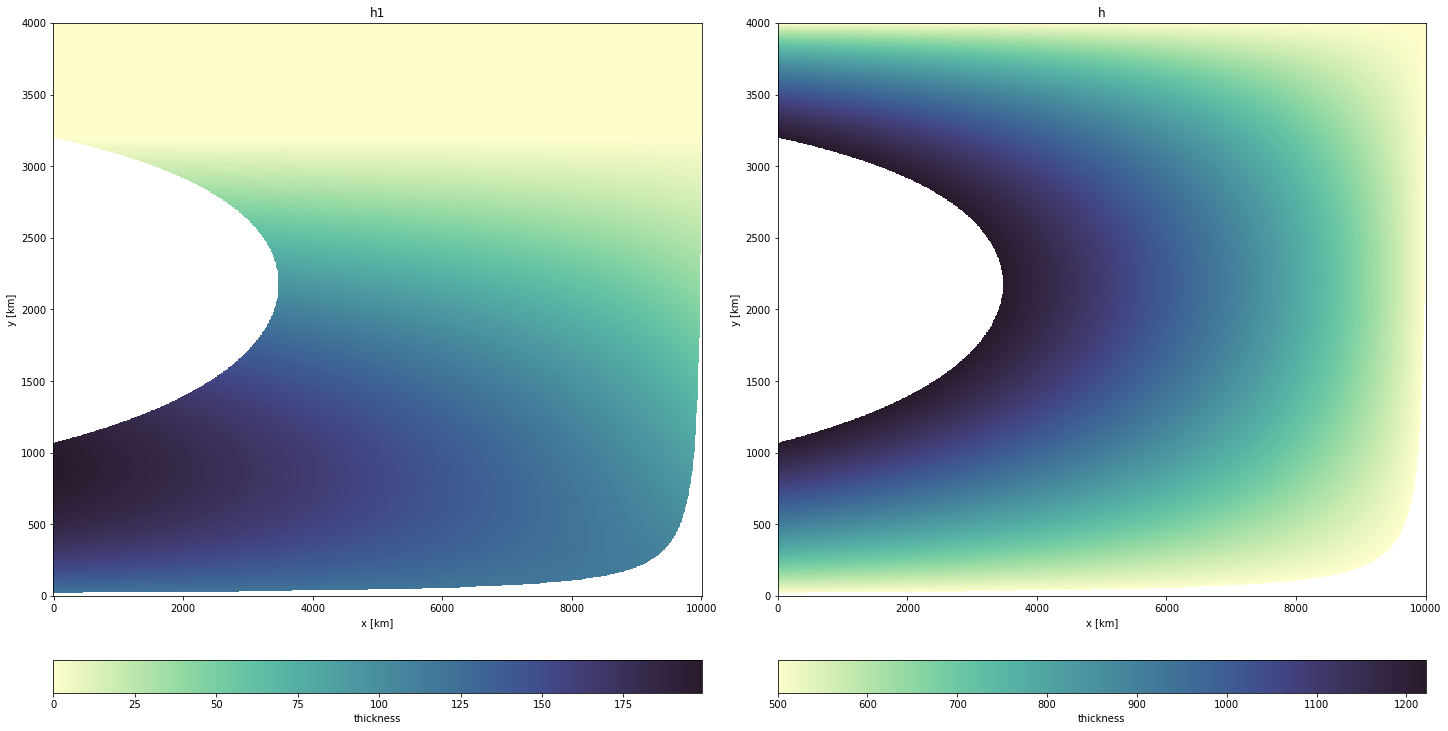

In [3]:
fig, axs = plt.subplots(1,2,figsize = (20,10),constrained_layout=True)
h[h_original<H]=np.nan
h[h_original>h_y2] = np.nan
h1[h_original<H]=np.nan
h1[h_original>h_y2] = np.nan
h2[h_original<H]=np.nan
h2[h_original>h_y2] = np.nan


im0 = axs[0].pcolormesh(x/1e3,y/1e3,h1,cmap=cmocean.cm.deep, vmin = 0, vmax = np.nanmax(h1))
im1 = axs[1].pcolormesh(x/1e3,y/1e3,h,cmap=cmocean.cm.deep, vmin = H, vmax = np.nanmax(h))
fig.colorbar(im0, ax = axs[0], location = 'bottom', label = 'thickness')
fig.colorbar(im1, ax = axs[1], location = 'bottom', label = 'thickness')
axs[0].set_title('h1')
axs[1].set_title('h')
axs[0].set_xlabel('x [km]')
axs[0].set_ylabel('y [km]')
axs[1].set_xlabel('x [km]')
axs[1].set_ylabel('y [km]')
plt.savefig('hw4c.png')

In [4]:
q_pool = f_y2/h_y2
h2_pool = f/q_pool
h1_pool0 = h_y2-h2_pool
wE = -tau0/f*(np.pi*np.sin(np.pi*y/M)/M)
A = 2*f*tau0*np.pi*np.sin(np.pi*y/M)/(g2_prime*beta*M)
x0 = L - (1/A)*(h_y2**2*(1+(g1_prime/g2_prime)*(1-f/f_y2)**2)-H**2)
x0[x0<0] = np.nan
# D02_0 = (2*f*tau0/(g2_prime*beta))*(L-x0)*(np.pi*np.sin(np.pi*y/M)/M)#+beta*np.cos(np.pi*y/M)/f)
# h0 = 
# h10 = (1-f/f_y2)*h0
a = 0.5*(g1_prime+g2_prime)/f
b = g2_prime*h2_pool/f
c = -f/beta*wE*(x-x0)-0.5*(g1_prime+g2_prime)*h1_pool0**2/f-g2_prime*h2_pool*h1_pool0/f
h1_pool = (-b+(b**2-4*a*c)**0.5)/(2*a)
h1_pool[h_original<h_y2]=np.nan
h2_pool[h_original<h_y2]=np.nan
h_pool = h1_pool+h2_pool

h1_shadow = ((g2_prime/g1_prime)**0.5)*D02**0.5
h2_shadow = H - h1_shadow
# h1_shadow[h1_shadow>h1_original] = np.nan
h1_shadow[h_original>H] = np.nan
h2_shadow[h_original>H] = np.nan
h_shadow = h1_shadow+h2_shadow

<ipython-input-4-358190a900d6>:6: RuntimeWarning: divide by zero encountered in true_divide
  x0 = L - (1/A)*(h_y2**2*(1+(g1_prime/g2_prime)*(1-f/f_y2)**2)-H**2)
<ipython-input-4-358190a900d6>:14: RuntimeWarning: invalid value encountered in sqrt
  h1_pool = (-b+(b**2-4*a*c)**0.5)/(2*a)


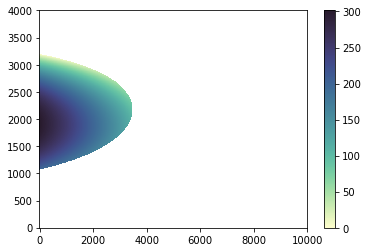

In [11]:
plt.pcolormesh(x/1e3,y/1e3,h1_pool,cmap=cmocean.cm.deep, vmin = 0, vmax = np.nanmax(h1_pool))
plt.colorbar()

In [5]:
h_final = h_original.copy()
h_final[h_original<H] = h_shadow[h_original<H]
h_final[h_original>h_y2] = h_pool[h_original>h_y2]
h1_final = h1.copy()
h1_final[h_original<H] = h1_shadow[h_original<H]
h1_final[h_original>h_y2] = h1_pool[h_original>h_y2]

h2_final = h2_original.copy()
h2_final[h_original<H] = h2_shadow[h_original<H]
h2_final[h_original>h_y2] = h2_pool[h_original>h_y2]


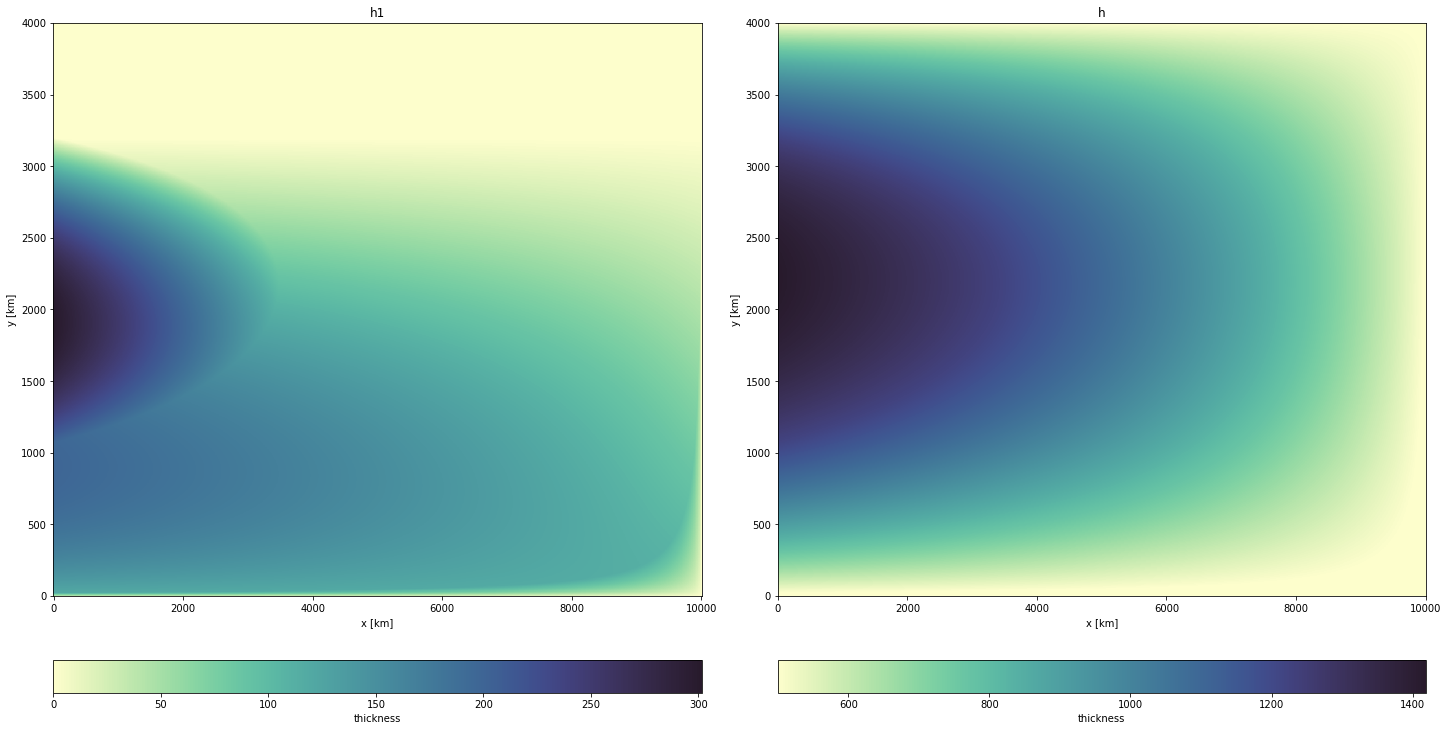

In [6]:
fig, axs = plt.subplots(1,2,figsize = (20,10),constrained_layout=True)
im0 = axs[0].pcolormesh(x/1e3,y/1e3,h1_final,cmap=cmocean.cm.deep, vmin = 0, vmax = np.nanmax(h1_final))
im1 = axs[1].pcolormesh(x/1e3,y/1e3,h_final,cmap=cmocean.cm.deep, vmin = H, vmax = np.nanmax(h_final))
fig.colorbar(im0, ax = axs[0], location = 'bottom', label = 'thickness')
fig.colorbar(im1, ax = axs[1], location = 'bottom', label = 'thickness')
axs[0].set_title('h1')
axs[1].set_title('h')
axs[0].set_xlabel('x [km]')
axs[0].set_ylabel('y [km]')
axs[1].set_xlabel('x [km]')
axs[1].set_ylabel('y [km]')
plt.savefig('hw4g.png')